<a target="_blank" href="https://colab.research.google.com/github/Marconi-Lab/dsa_2024/blob/yuri/dsa2024-yolov8-classification-training.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# YOLOv8

* It is 8th model in the You Only Look Once(YOLO) algorithm series. YOLO is mostly known for object detection and classification and segmentation tasks.
* It is a single shot algorithm (directly classifies an object in a single pass by having one NN predict bounding boxes and class probabilities using a full image as an input).
* Based on the number of parameters it comes in 5 variants:
    * nano (n)
    * small (s)
    * medium (m)
    * large (l)
    * extra large (x)

# Classification using YOLOv8

## Settings to install YOLOv8 packages

Ultralytics YOLOv8 is a cutting-edge, state-of-the-art (SOTA) model that builds upon the success of previous YOLO versions and introduces new features and improvements to further boost performance and flexibility. YOLOv8 is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and tracking, instance segmentation, image classification and pose estimation tasks.



In [ ]:
!pip install ultralytics
!pip install -U ipywidgets

## Modelling



In [2]:
import torch #to send yolov8 to cuda device
from ultralytics import YOLO #get yolo model package
import matplotlib.pyplot as plt #for plotting

# Check for CUDA device and set it
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

## Load a model
model = YOLO('yolov8n-cls.yaml').load('yolov8n-cls.pt').to(device)  # build from YAML and transfer weights

Using device: cuda
YOLOv8n-cls summary: 99 layers, 2719288 parameters, 2719288 gradients, 4.4 GFLOPs


100%|██████████| 5.30M/5.30M [00:00<00:00, 75.9MB/s]


Transferred 158/158 items from pretrained weights


# Download training dataset from roboflow

![](https://blog.roboflow.com/assets/images/logo-4x.png?v=0d2f75cb36)

In [3]:
import urllib.request

url = "https://app.roboflow.com/ds/U8eETZqOAo?key=9AAIElFVFm"
urllib.request.urlretrieve(url, "file.zip")
print("File downloaded successfully!")

File downloaded successfully!


Unzip the dataset

In [ ]:
!mkdir data
!unzip file.zip -d data/


# Training on DSAIL-Porini for Image Classification

Train the classification model on GPU or CPU on the downloaded and unzipped dataset by calling `.train(...)` on the dataset

In [5]:
import os
os.environ['WANDB_MODE'] = 'disabled'

In [6]:
import torch
from ultralytics import YOLO

# Check for CUDA device and set it
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

# Load model
model = YOLO('yolov8n-cls.pt').to(device)

# Train the model
results = model.train(data='/content/data', epochs=100, imgsz=256)

Using device: cuda
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/data, epochs=100, time=None, patience=100, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=F

100%|██████████| 6.23M/6.23M [00:00<00:00, 77.6MB/s]


AMP: checks passed ✅


train: Scanning /content/data/train... 1220 images, 0 corrupt: 100%|██████████| 1220/1220 [00:00<00:00, 3427.18it/s]

train: New cache created: /content/data/train.cache



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/data/test... 59 images, 0 corrupt: 100%|██████████| 59/59 [00:00<00:00, 1432.66it/s]

val: New cache created: /content/data/test.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 256 train, 256 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100     0.587G      1.161         16        256:   6%|▋         | 5/77 [00:02<00:21,  3.29it/s]

      1/100     0.587G       1.16         16        256:   9%|▉         | 7/77 [00:03<00:28,  2.46it/s]
100%|██████████| 755k/755k [00:00<00:00, 18.0MB/s]
      1/100     0.591G     0.8271          4        256: 100%|██████████| 77/77 [00:26<00:00,  2.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all      0.915          1



      Epoch    GPU_mem       loss  Instances       Size


      2/100      0.56G     0.2523          4        256: 100%|██████████| 77/77 [00:20<00:00,  3.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 36.82it/s]

                   all      0.932          1



      Epoch    GPU_mem       loss  Instances       Size


      3/100      0.56G     0.1181          4        256: 100%|██████████| 77/77 [00:23<00:00,  3.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.57it/s]

                   all      0.932          1



      Epoch    GPU_mem       loss  Instances       Size


      4/100     0.428G    0.08931          4        256: 100%|██████████| 77/77 [00:17<00:00,  4.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.40it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      5/100     0.428G     0.1048          4        256: 100%|██████████| 77/77 [00:17<00:00,  4.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 27.71it/s]

                   all      0.949          1



      Epoch    GPU_mem       loss  Instances       Size


      6/100     0.558G    0.07454          4        256: 100%|██████████| 77/77 [00:20<00:00,  3.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.76it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      7/100     0.432G    0.07039          4        256: 100%|██████████| 77/77 [00:18<00:00,  4.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.34it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      8/100     0.442G    0.05399          4        256: 100%|██████████| 77/77 [00:21<00:00,  3.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.55it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      9/100     0.442G    0.05315          4        256: 100%|██████████| 77/77 [00:18<00:00,  4.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.56it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     10/100     0.558G    0.04367          4        256: 100%|██████████| 77/77 [00:17<00:00,  4.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 27.84it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     11/100     0.434G    0.03258          4        256: 100%|██████████| 77/77 [00:19<00:00,  3.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.05it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     12/100     0.442G    0.02685          4        256: 100%|██████████| 77/77 [00:21<00:00,  3.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.52it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     13/100     0.442G     0.0341          4        256: 100%|██████████| 77/77 [00:19<00:00,  3.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.04it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     14/100     0.558G    0.05776          4        256: 100%|██████████| 77/77 [00:17<00:00,  4.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.02it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     15/100     0.432G    0.03175          4        256: 100%|██████████| 77/77 [00:18<00:00,  4.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 26.46it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     16/100     0.442G    0.02775          4        256: 100%|██████████| 77/77 [00:19<00:00,  3.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.50it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     17/100     0.442G    0.03318          4        256: 100%|██████████| 77/77 [00:17<00:00,  4.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.54it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     18/100     0.558G    0.03894          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.85it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     19/100     0.434G    0.03198          4        256: 100%|██████████| 77/77 [00:18<00:00,  4.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.43it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     20/100      0.44G    0.03149          4        256: 100%|██████████| 77/77 [00:15<00:00,  4.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.91it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     21/100     0.442G     0.0309          4        256: 100%|██████████| 77/77 [00:15<00:00,  4.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.22it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     22/100     0.558G    0.01984          4        256: 100%|██████████| 77/77 [00:15<00:00,  4.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.70it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     23/100     0.434G    0.03102          4        256: 100%|██████████| 77/77 [00:15<00:00,  4.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.48it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     24/100     0.442G     0.0224          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 42.25it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     25/100     0.442G    0.02197          4        256: 100%|██████████| 77/77 [00:15<00:00,  4.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.25it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     26/100     0.558G    0.03585          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 35.93it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     27/100     0.434G    0.01767          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.85it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     28/100     0.442G     0.0126          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 32.04it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     29/100     0.442G     0.0181          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 29.77it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     30/100     0.558G    0.01962          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 27.50it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     31/100     0.432G    0.03437          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.42it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     32/100     0.442G    0.01805          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 28.68it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     33/100     0.442G    0.01996          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.01it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     34/100     0.558G    0.03391          4        256: 100%|██████████| 77/77 [00:17<00:00,  4.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.30it/s]


                   all      0.966          1

      Epoch    GPU_mem       loss  Instances       Size


     35/100     0.432G    0.03298          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00,  9.78it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     36/100     0.442G    0.02145          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.69it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     37/100     0.442G    0.03085          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 40.94it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     38/100     0.558G    0.02056          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.77it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     39/100     0.434G    0.01202          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 33.65it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     40/100     0.442G    0.01401          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.83it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     41/100     0.442G    0.01664          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.13it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     42/100     0.558G    0.01796          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.88it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     43/100     0.434G   0.008727          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 30.46it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     44/100     0.442G    0.01381          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.11it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     45/100     0.442G      0.011          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.89it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     46/100     0.558G    0.02211          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 35.67it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     47/100     0.434G    0.01872          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.57it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     48/100     0.442G    0.01954          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.16it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     49/100     0.442G    0.01079          4        256: 100%|██████████| 77/77 [00:15<00:00,  4.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.92it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     50/100     0.558G    0.01636          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.34it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     51/100     0.434G     0.0157          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 12.83it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     52/100     0.442G    0.01692          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 29.05it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     53/100     0.442G    0.02329          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 34.94it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


     54/100     0.558G    0.01704          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.87it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     55/100     0.434G    0.01497          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 28.07it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     56/100      0.44G    0.01405          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 42.49it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     57/100      0.44G    0.01083          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 28.95it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     58/100     0.558G    0.01284          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 26.09it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     59/100     0.434G    0.01741          4        256: 100%|██████████| 77/77 [00:17<00:00,  4.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.39it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     60/100      0.44G   0.005843          4        256: 100%|██████████| 77/77 [00:17<00:00,  4.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.07it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     61/100      0.44G   0.008398          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.05it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     62/100     0.558G    0.01355          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 28.22it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     63/100     0.432G    0.01159          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.02it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     64/100     0.442G    0.01074          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.30it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     65/100     0.442G    0.01446          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 33.88it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     66/100     0.558G   0.006945          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.78it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     67/100     0.434G    0.01142          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.73it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     68/100     0.442G    0.01211          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.44it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     69/100     0.442G   0.009095          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 43.59it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     70/100     0.558G   0.003817          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.63it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     71/100     0.434G   0.006471          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.11it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     72/100     0.442G    0.01479          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.78it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     73/100     0.442G    0.00891          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.24it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     74/100     0.558G   0.006899          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.86it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     75/100     0.432G   0.007295          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.78it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     76/100     0.442G    0.01132          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.17it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     77/100     0.442G   0.007794          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.89it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     78/100     0.558G   0.008642          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.51it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     79/100     0.434G   0.007379          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.98it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     80/100     0.442G    0.00298          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 31.39it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     81/100     0.442G    0.01382          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 31.10it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     82/100     0.558G    0.01281          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 39.29it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     83/100     0.434G    0.01535          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.83it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     84/100     0.442G    0.01165          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.26it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     85/100     0.442G   0.006241          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.14it/s]


                   all      0.966          1

      Epoch    GPU_mem       loss  Instances       Size


     86/100     0.558G   0.007924          4        256: 100%|██████████| 77/77 [00:15<00:00,  4.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.20it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     87/100     0.434G   0.009979          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.59it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     88/100     0.442G   0.007443          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.87it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     89/100     0.442G   0.006606          4        256: 100%|██████████| 77/77 [00:15<00:00,  4.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.85it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     90/100     0.558G   0.005477          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.67it/s]

                   all      0.966          1



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem       loss  Instances       Size


     91/100     0.432G   0.003946          4        256: 100%|██████████| 77/77 [00:17<00:00,  4.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.14it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     92/100     0.442G   0.007656          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 36.01it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     93/100     0.442G     0.0106          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 28.33it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     94/100     0.558G   0.007704          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 28.55it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     95/100     0.434G    0.01019          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.26it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     96/100     0.442G    0.00755          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.84it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     97/100     0.442G    0.01101          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 30.48it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     98/100     0.558G    0.00922          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 28.48it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


     99/100     0.434G   0.008739          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.98it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


    100/100     0.442G   0.003819          4        256: 100%|██████████| 77/77 [00:16<00:00,  4.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.50it/s]

                   all      0.966          1



100 epochs completed in 0.518 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics YOLOv8.2.15 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1438723 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/data/train... found 1220 images in 3 classes ✅ 
val: None...
test: /content/data/test... found 59 images in 3 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.28it/s]


                   all      0.983          1
Speed: 0.1ms preprocess, 0.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


# Assess the training and Validation performance

YOLO stores the training results in the working folder called `runs/`

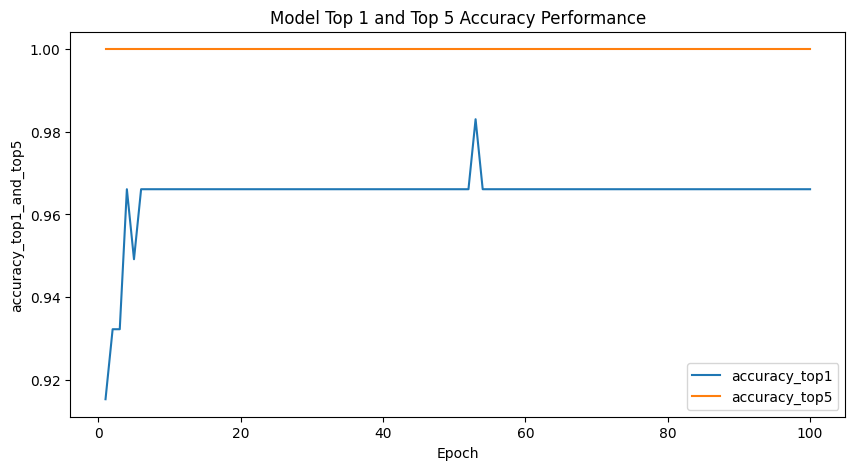

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your results file
df = pd.read_csv('runs/classify/train/results.csv')

# Plotting the mAP value
plt.figure(figsize=(10, 5))
plt.plot(df['                  epoch'], df['  metrics/accuracy_top1'], label='accuracy_top1')
plt.plot(df['                  epoch'], df['  metrics/accuracy_top5'], label='accuracy_top5')
plt.xlabel('Epoch')
plt.ylabel('accuracy_top1_and_top5')
plt.title('Model Top 1 and Top 5 Accuracy Performance')
plt.legend()
plt.show()

# You can also plot other metrics similarly by changing the column name, e.g., df['precision'], df['recall']

Top5 accuracy is 1 because there are only 3 classes

In [8]:
df.columns

Index(['                  epoch', '             train/loss',
       '  metrics/accuracy_top1', '  metrics/accuracy_top5',
       '               val/loss', '                 lr/pg0',
       '                 lr/pg1', '                 lr/pg2'],
      dtype='object')

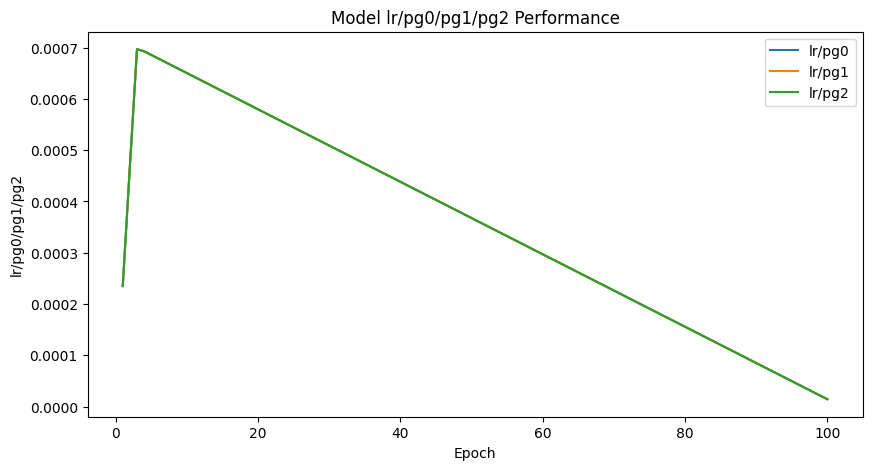

In [9]:
# Plotting the mAP value
plt.figure(figsize=(10, 5))
plt.plot(df['                  epoch'], df['                 lr/pg0'], label='lr/pg0')
plt.plot(df['                  epoch'], df['                 lr/pg1'], label='lr/pg1')
plt.plot(df['                  epoch'], df['                 lr/pg2'], label='lr/pg2')
plt.xlabel('Epoch')
plt.ylabel('lr/pg0/pg1/pg2')
plt.title('Model lr/pg0/pg1/pg2 Performance')
plt.legend()
plt.show()

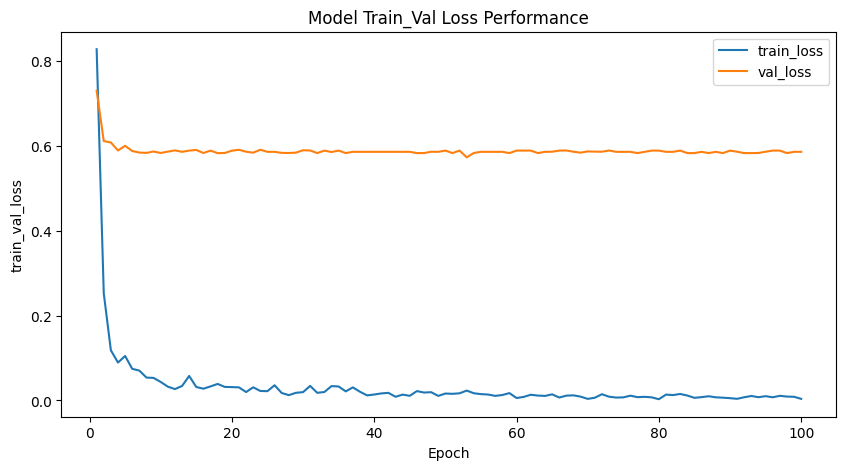

In [10]:
# Plotting the mAP value
plt.figure(figsize=(10, 5))
plt.plot(df['                  epoch'], df['             train/loss'], label='train_loss')
plt.plot(df['                  epoch'], df['               val/loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('train_val_loss')
plt.title('Model Train_Val Loss Performance')
plt.legend()
plt.show()

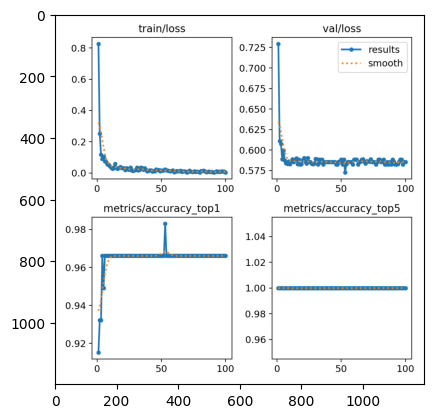

In [11]:
plt.imshow(plt.imread("/content/runs/classify/train/results.png"))

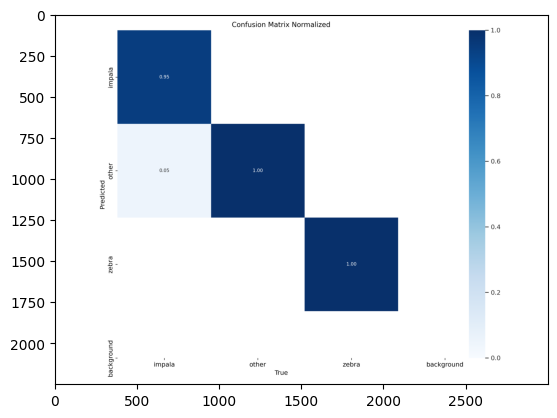

In [12]:
plt.imshow(plt.imread("/content/runs/classify/train/confusion_matrix_normalized.png"))

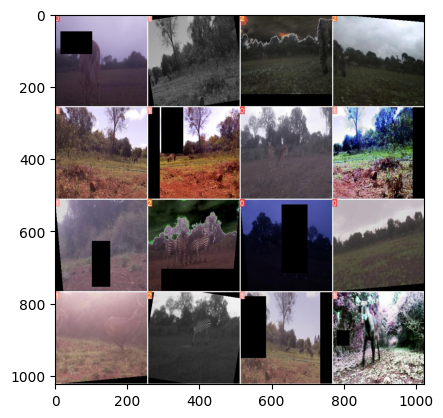

In [13]:
plt.imshow(plt.imread("/content/runs/classify/train/train_batch1.jpg"))

In [15]:
url = "https://raw.githubusercontent.com/Marconi-Lab/dsa_2024/main/assets/2021-07-09-09-09-05.jpg?token=GHSAT0AAAAAACNP3JI5UPICZE4YTEBAVAXMZSDSKDA"
urllib.request.urlretrieve(url, "2021-07-09-09-09-05.jpg")
print("Sample Image file downloaded successfully!")

image_path='/content/2021-07-09-09-09-05.jpg'
results = model(image_path)  # predict on an image

Sample Image file downloaded successfully!

image 1/1 /content/2021-07-09-09-09-05.jpg: 256x256 impala 1.00, other 0.00, zebra 0.00, 6.2ms
Speed: 30.1ms preprocess, 6.2ms inference, 0.2ms postprocess per image at shape (1, 3, 256, 256)


In [16]:
names_dict = results[0].names

probs = results[0].probs.data.tolist()

print("Top 1 Class : ",results[0].probs.top1)
print("Top 1 Confidence : ",results[0].probs.top1conf)

Top 1 Class :  0
Top 1 Confidence :  tensor(1., device='cuda:0')


In [17]:
results[0].names[results[0].probs.top1]

'impala'

impala   100.0%


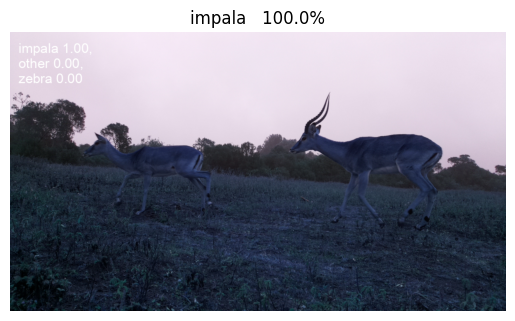

In [18]:
title=f"{str(results[0].names[results[0].probs.top1])+'   '+str(results[0].probs.top1conf.item()*100)+'%'}"
print(title)
plt.imshow(results[0].plot())
plt.axis('off')
# Add title
title=f"{str(results[0].names[results[0].probs.top1])+'   '+str(round(float(results[0].probs.top1conf.item()*100),2))+'%'}"
plt.title(title)
# Show the plot
plt.show()

The best model is saved in `/runs/classify/train/weights/best.pt`

The last model is saved in `/runs/classify/train/weights/last.pt`

# References

1. [How to improve the loss values and loss curves of the YOLOv8 model ?](https://github.com/ultralytics/ultralytics/issues/8955)
2. [Are class and box losses calculated the same in YoloV8 and YoloV5?](https://github.com/ultralytics/ultralytics/issues/2789)